In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2  # OpenCV for image processing
import numpy as np
import matplotlib.pyplot as plt
from glob import glob






Data Augmentation Part

In [ ]:

# Paths
main_input_dir = '/content/drive/MyDrive/newDataset/My dataset new/My dataset'  # Path to main dataset folder
main_output_dir = '/content/drive/MyDrive/newDataset/My dataset new/MyAugmentdataset'  # Path to save augmented dataset

# Create output directory if it doesn't exist
os.makedirs(main_output_dir, exist_ok=True)

# Define augmentation functions
def preprocess_image(img, size=(200, 200)):
    resized = cv2.resize(img, size, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    return resized, gray

def flip_image(img):
    return cv2.flip(img, 1)

def rotate_image(img, angle=45):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))

def adjust_brightness(img, brightness=50):
    return cv2.convertScaleAbs(img, alpha=1, beta=brightness)

# Loop through subdirectories
for sub_dir in os.listdir(main_input_dir):
    input_dir = os.path.join(main_input_dir, sub_dir)

    # Skip non-directories
    if not os.path.isdir(input_dir):
        continue

    # Create a corresponding output directory
    output_dir = os.path.join(main_output_dir, sub_dir)
    os.makedirs(output_dir, exist_ok=True)

    # Get all image paths in the subdirectory
    image_paths = glob(os.path.join(input_dir, '*.jpg'))

    for idx, img_path in enumerate(image_paths):
        # Load the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue

        # Apply augmentations
        resized, gray = preprocess_image(img)
        flipped = flip_image(resized)
        rotated = rotate_image(resized)
        brightened = adjust_brightness(resized)

        # Save augmented images
        base_name = os.path.splitext(os.path.basename(img_path))[0]
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_resized.jpg"), resized)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_gray.jpg"), gray)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_flipped.jpg"), flipped)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_rotated.jpg"), rotated)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_brightened.jpg"), brightened)

        print(f"Processed {idx + 1}/{len(image_paths)} in {sub_dir}: {base_name}")



Processed 1/279 in Prabhas: 18
Processed 2/279 in Prabhas: 139
Processed 3/279 in Prabhas: 101
Processed 4/279 in Prabhas: 112
Processed 5/279 in Prabhas: 14
Processed 6/279 in Prabhas: 132
Processed 7/279 in Prabhas: 125
Processed 8/279 in Prabhas: 133
Processed 9/279 in Prabhas: 121
Processed 10/279 in Prabhas: 117
Processed 11/279 in Prabhas: 12
Processed 12/279 in Prabhas: 114
Processed 13/279 in Prabhas: 10
Processed 14/279 in Prabhas: 134
Processed 15/279 in Prabhas: 17
Processed 16/279 in Prabhas: 130
Processed 17/279 in Prabhas: 119
Processed 18/279 in Prabhas: 136
Processed 19/279 in Prabhas: 102
Processed 20/279 in Prabhas: 128
Processed 21/279 in Prabhas: 120
Processed 22/279 in Prabhas: 115
Processed 23/279 in Prabhas: 122
Processed 24/279 in Prabhas: 106
Processed 25/279 in Prabhas: 118
Processed 26/279 in Prabhas: 126
Processed 27/279 in Prabhas: 2
Processed 28/279 in Prabhas: 100
Processed 29/279 in Prabhas: 140
Processed 30/279 in Prabhas: 137
Processed 31/279 in Prabha

**Build the Model**

**75% train, 15% validation, 10% test**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Input and output paths
input_folder = '/content/drive/MyDrive/newDataset/My dataset new/MyAugmentdataset'  # Path to the original dataset
output_folder = '/content/drive/MyDrive/newDataset/My dataset new/datasetsplit'    # Path to the split dataset

os.makedirs(output_folder, exist_ok=True)

# Create train, validation, and test folders
os.makedirs(f"{output_folder}/train", exist_ok=True)
os.makedirs(f"{output_folder}/validation", exist_ok=True)
os.makedirs(f"{output_folder}/test", exist_ok=True)

# Get all class folders
class_folders = [folder for folder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, folder))]

# Split each class into train, validation, and test sets
for class_name in class_folders:
    class_path = os.path.join(input_folder, class_name)
    images = os.listdir(class_path)

    # # Split data: 60% train, 20% validation, 20% test
    # train, test = train_test_split(images, test_size=0.2, random_state=42)
    # train, val = train_test_split(train, test_size=0.25, random_state=42)  # 60/20/20 split

    train, test = train_test_split(images, test_size=0.1, random_state=42)
    # Split the 90% train_val into 75% train and 15% val
    train, val = train_test_split(train, test_size=0.1667, random_state=42)

    # Create class subdirectories in output folders
    os.makedirs(f"{output_folder}/train/{class_name}", exist_ok=True)
    os.makedirs(f"{output_folder}/validation/{class_name}", exist_ok=True)
    os.makedirs(f"{output_folder}/test/{class_name}", exist_ok=True)

    # Move images to their respective folders
    for img in train:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/train/{class_name}/{img}")
    for img in val:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/validation/{class_name}/{img}")
    for img in test:
        shutil.move(os.path.join(class_path, img), f"{output_folder}/test/{class_name}/{img}")

print("Dataset successfully split into train, validation, and test sets!")


Dataset successfully split into train, validation, and test sets!


**check if it divided correctly or not**

In [ ]:
import os

# Function to count images in a folder
def count_images(folder_path):
    counts = {class_name: len(os.listdir(os.path.join(folder_path, class_name))) for class_name in os.listdir(folder_path)}
    return counts

print("Train distribution:", count_images(f"{output_folder}/train"))
print("Validation distribution:", count_images(f"{output_folder}/validation"))
print("Test distribution:", count_images(f"{output_folder}/test"))

Train distribution: {'Prabhas': 1282, 'vijay': 1259, 'Amitabh Bachchan': 847, 'Akshay Kumar': 1120}
Validation distribution: {'Prabhas': 375, 'vijay': 253, 'Amitabh Bachchan': 170, 'Akshay Kumar': 225}
Test distribution: {'Prabhas': 257, 'vijay': 168, 'Amitabh Bachchan': 113, 'Akshay Kumar': 150}


Found 3420 files belonging to 4 classes.
['Akshay Kumar', 'Amitabh Bachchan', 'Prabhas', 'vijay']
Found 1140 files belonging to 4 classes.
Found 1140 files belonging to 4 classes.
Data prepared successfully!


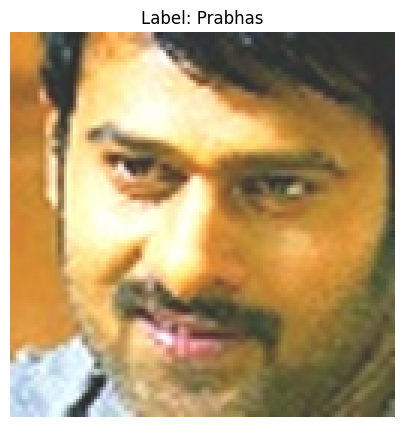

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define paths to datasets
train_dir = '/content/drive/MyDrive/newDataset/My dataset new/dataset_split/train'
val_dir = '/content/drive/MyDrive/newDataset/My dataset new/dataset_split/validation'
test_dir = '/content/drive/MyDrive/newDataset/My dataset new/dataset_split/test'

# Define image properties
image_size = (128, 128)  # Resize images
batch_size = 16

# Create data loaders
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size
)
class_names = train_dataset.class_names
print(train_dataset.class_names)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size
)

# Normalize the datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

print("Data prepared successfully!")

# Display one image from the train_dataset with class name
for images, labels in train_dataset.take(1):  # Take one batch
    plt.figure(figsize=(5, 5))
    plt.imshow(images[0].numpy())  # Show the first image in the batch
    class_name = class_names[labels[0].numpy()]  # Get the class name
    plt.title(f"Label: {class_name}")  # Display class name
    plt.axis('off')
    plt.show()





In [ ]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11, activation='softmax')  # Adjust number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,059 (12.61 MB)

 Trainable params: 3,306,059 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

None


**change the batch size to 8 **

In [ ]:
a = model.fit(
    train_dataset,
    validation_data=val_dataset,
    batch_size=16,
    epochs=10
)

Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.2863 - loss: 1.4797 - val_accuracy: 0.5561 - val_loss: 1.0572
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 199s 704ms/step - accuracy: 0.5795 - loss: 1.0206 - val_accuracy: 0.6974 - val_loss: 0.8051
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 152s 711ms/step - accuracy: 0.7514 - loss: 0.6574 - val_accuracy: 0.7254 - val_loss: 0.8676
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 147s 684ms/step - accuracy: 0.8662 - loss: 0.3677 - val_accuracy: 0.7833 - val_loss: 0.8122
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 149s 693ms/step - accuracy: 0.9340 - loss: 0.1951 - val_accuracy: 0.7982 - val_loss: 0.9123
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 191s 641ms/step - accuracy: 0.9572 - loss: 0.1274 - val_accuracy: 0.7904 - val_loss: 1.0658
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 142s 664ms/step - accuracy: 0.9771 - loss: 0.0715 - val_accuracy: 0.8132 - val_loss: 1.0453
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 137s 639ms/step - accuracy: 0.9899 - lo

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7659 - loss: 1.6005
Test Loss: 1.6514806747436523, Test Accuracy: 0.7675438523292542


In [ ]:
model.save('/content/drive/MyDrive/newDataset/My dataset new/mymodel5.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


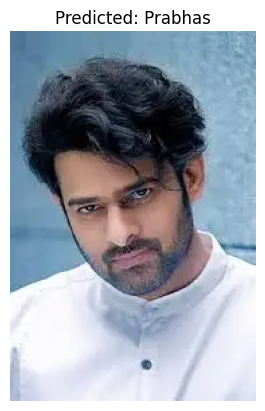

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


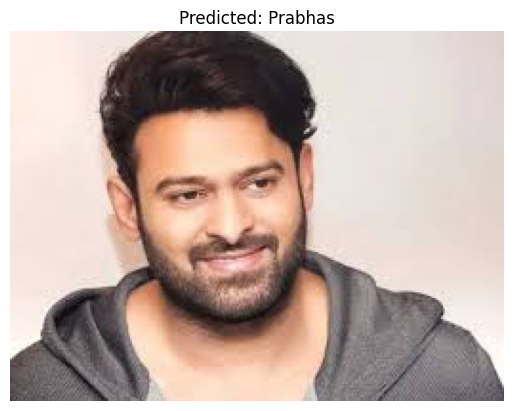

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


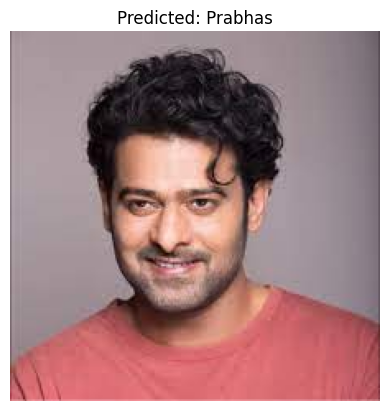

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


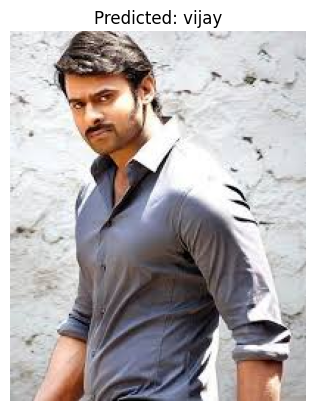

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


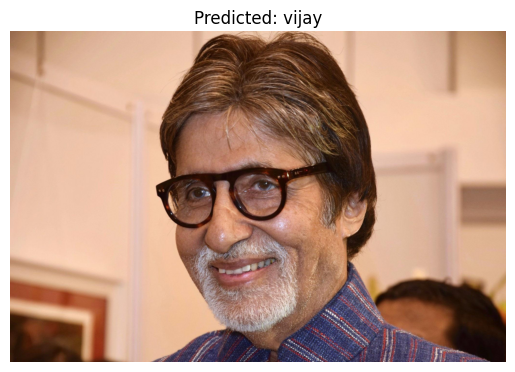

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


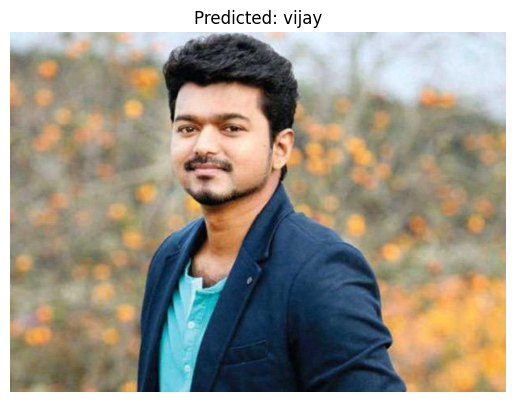

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


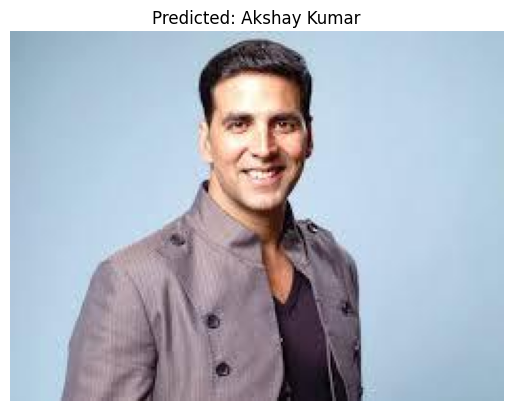

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


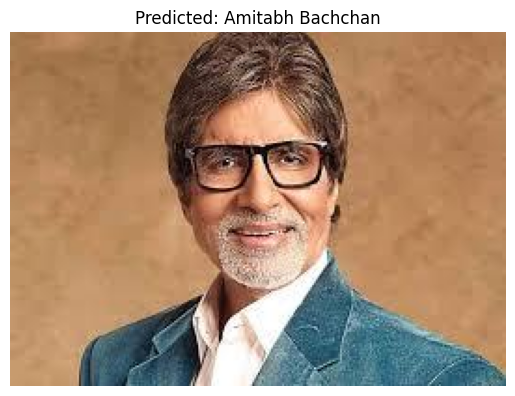

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/newDataset/My dataset new/mymodel3.keras')

# Define class names (replace with your class names)
# class_names = ['Amitabh Bachchan','vijay','Prabhas','Akshay Kumar']
class_names = ['Akshay Kumar', 'Amitabh Bachchan', 'Prabhas', 'vijay']

def preprocess_image(image_path):
    """
    Preprocess the unseen image to match the model's input requirements.
    """
    # Load the image
    image = Image.open(image_path)
    # Resize to the model's input size (128x128)
    image = image.resize((128, 128))
    # Convert to a numpy array
    image_array = np.array(image)
    # Normalize the pixel values to [0, 1]
    image_array = image_array / 255.0
    # Add a batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

def test_multiple_images(image_paths):
    """
    Test multiple unseen images and display the predictions.
    """
    for image_path in image_paths:
        # Preprocess the image
        input_image = preprocess_image(image_path)

        # Predict using the model
        predictions = model.predict(input_image)

        # Get the predicted class
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class_index]

        # Display the image with the prediction
        plt.figure()
        plt.imshow(Image.open(image_path))
        plt.title(f"Predicted: {predicted_class_name}")
        plt.axis('off')
        plt.show()

# Directory containing the test images
image_directory = '/content/drive/MyDrive/newDataset/My dataset new/un_seen'  # Replace with the directory path containing your images

# Get a list of image paths
image_paths = [os.path.join(image_directory, img) for img in os.listdir(image_directory)[:10]]  # Limit to 10 images

# Test and display results
test_multiple_images(image_paths)


In [ ]:
import requests
from io import BytesIO
from PIL import Image

# Provide the URL of the image
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFHaZdxwHMpPTw0vQsQHFWEBfGBZD4LqWARw&s'
# Download the image
response = requests.get(url)
if response.status_code == 200:
    # Load image from the response
    image = Image.open(BytesIO(response.content))
    image.save('/content/drive/MyDrive/newDataset/My dataset new/un_seen/A2.jpg')  # Save locally for further processing
    image_path = 'A2.jpg'
else:
    raise ValueError("Failed to download image.")
